In [1]:
from obspy import read

In [2]:
st = read ('2021-10-07-mww59-near-east-coast-of-honshu-japan-2.miniseed')
print(st)

15 Trace(s) in Stream:
II.ERM.00.BH1  | 2021-10-07T13:42:02.019539Z - 2021-10-07T13:53:01.969539Z | 20.0 Hz, 13200 samples
II.ERM.00.BH2  | 2021-10-07T13:42:02.019539Z - 2021-10-07T13:53:01.969539Z | 20.0 Hz, 13200 samples
II.ERM.00.BHZ  | 2021-10-07T13:42:02.019539Z - 2021-10-07T13:53:01.969539Z | 20.0 Hz, 13200 samples
II.ERM.10.BH1  | 2021-10-07T13:42:02.019538Z - 2021-10-07T13:53:01.994538Z | 40.0 Hz, 26400 samples
II.ERM.10.BH2  | 2021-10-07T13:42:02.019538Z - 2021-10-07T13:53:01.994538Z | 40.0 Hz, 26400 samples
II.ERM.10.BHZ  | 2021-10-07T13:42:02.019538Z - 2021-10-07T13:53:01.994538Z | 40.0 Hz, 26400 samples
IU.MAJO.00.BH1 | 2021-10-07T13:40:52.019538Z - 2021-10-07T13:51:51.969538Z | 20.0 Hz, 13200 samples
IU.MAJO.00.BH2 | 2021-10-07T13:40:52.019538Z - 2021-10-07T13:51:51.969538Z | 20.0 Hz, 13200 samples
IU.MAJO.00.BHZ | 2021-10-07T13:40:52.019538Z - 2021-10-07T13:51:51.969538Z | 20.0 Hz, 13200 samples
IU.MAJO.10.BH1 | 2021-10-07T13:40:52.019538Z - 2021-10-07T13:51:51.994538Z | 

In [3]:
tr = st[0]
print(tr)

II.ERM.00.BH1 | 2021-10-07T13:42:02.019539Z - 2021-10-07T13:53:01.969539Z | 20.0 Hz, 13200 samples


In [4]:
data =tr.data
print(data)

[-2617 -2745 -2882 ...,  2899  2665  2501]


In [5]:
print(tr.stats)

         network: II
         station: ERM
        location: 00
         channel: BH1
       starttime: 2021-10-07T13:42:02.019539Z
         endtime: 2021-10-07T13:53:01.969539Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 13200
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 7, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 728576})


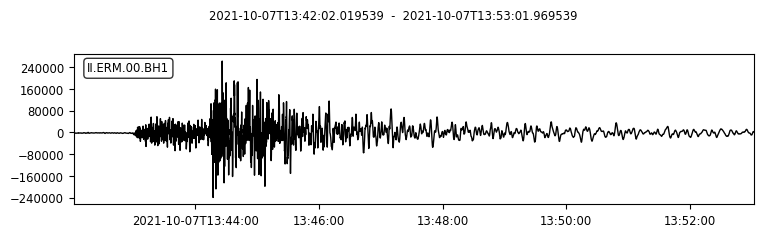

In [6]:
tr.plot();

In [8]:
net = 'II'
sta = 'ERM'
loc ='*'
chan ='BH*'

In [52]:
from obspy import UTCDateTime

time = UTCDateTime('2021-10-07T13:42:02')
print(time)

2021-10-07T13:42:02.000000Z


In [53]:
starttime = time - 60
endtime = time + 11*60

print(starttime, endtime)

2021-10-07T13:41:02.000000Z 2021-10-07T13:53:02.000000Z


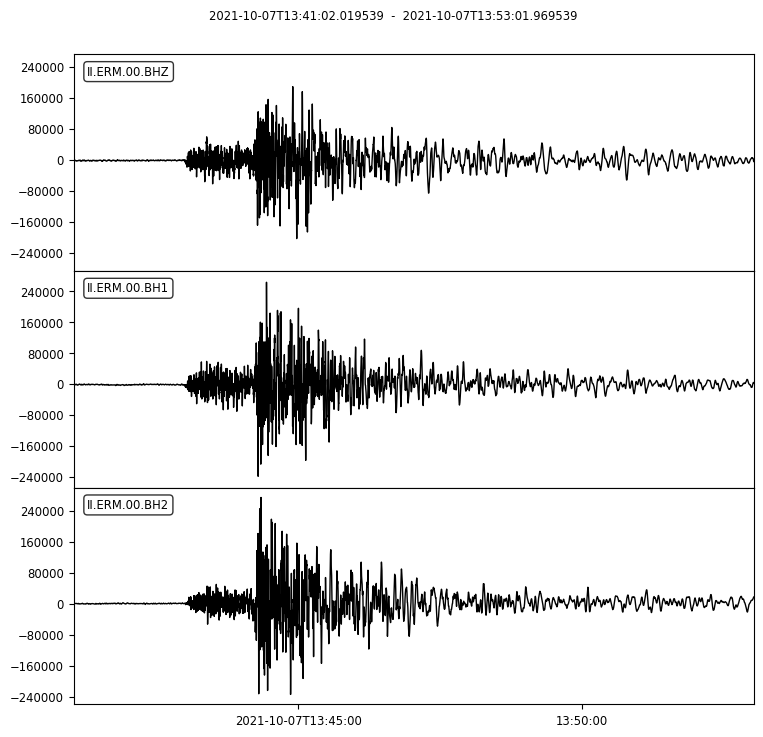

In [54]:
from obspy.clients.fdsn import Client

client = Client('IRIS')
st = client.get_waveforms(net, sta, loc, chan, starttime, endtime)
st.plot();

3 Trace(s) in Stream:
II.ERM.00.BH1 | 2021-10-07T13:41:02.019539Z - 2021-10-07T13:53:01.969539Z | 20.0 Hz, 14400 samples
II.ERM.00.BH2 | 2021-10-07T13:41:02.019539Z - 2021-10-07T13:53:01.969539Z | 20.0 Hz, 14400 samples
II.ERM.00.BHZ | 2021-10-07T13:41:02.019539Z - 2021-10-07T13:53:01.969539Z | 20.0 Hz, 14400 samples


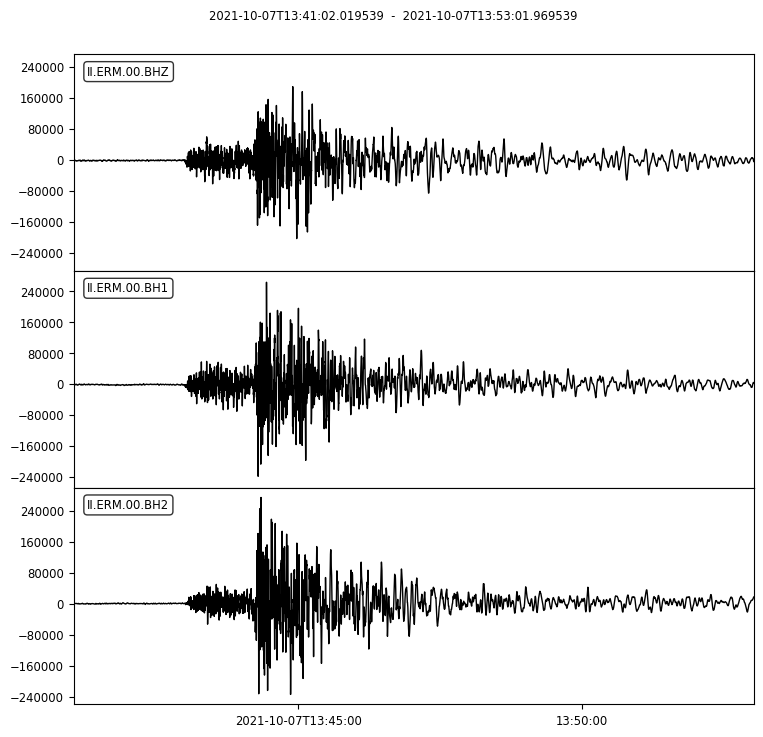

In [84]:
net = 'II'
sta = 'ERM'
loc ='00'
chan ='BH*'

st = client.get_waveforms(net, sta, loc, chan, starttime, endtime)
print(st)
st.plot();

In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
Data =[]
for i in range(len(st)):
    Data2 = st[i].data
    Data.append(Data2)

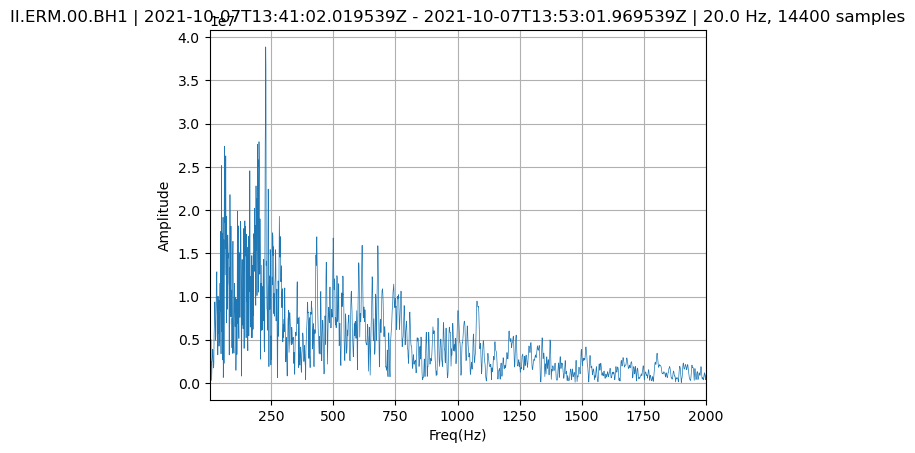

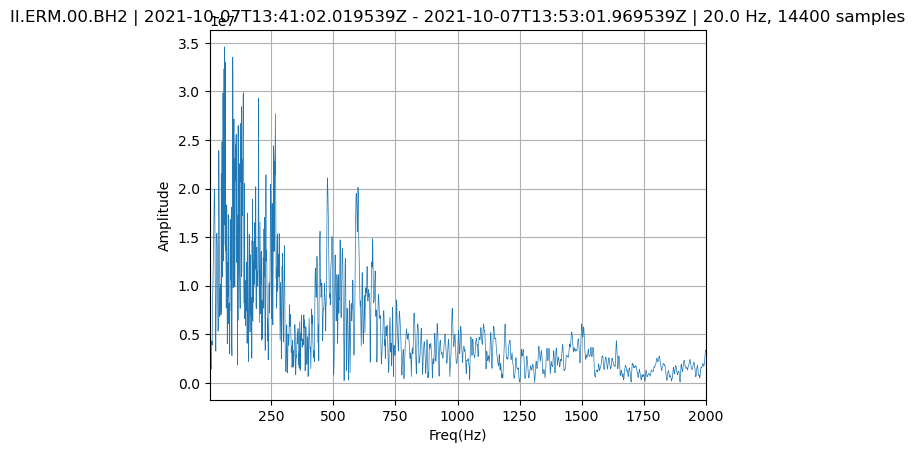

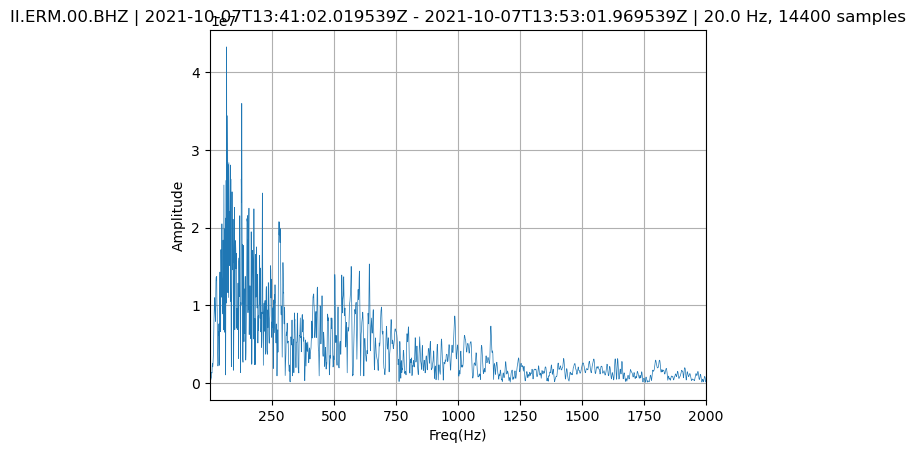

In [98]:
Datafft = []
for i in range(len(Data)):
    datafft = np.fft.rfft(Data[i])
    Datafft.append(datafft)
    plt.figure(i+1)
    plt.plot(abs(Datafft[i]),linewidth=0.5)
    plt.title(str(st[i]))
    plt.xlabel('Freq(Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.xlim((10**0),(2*10**3))
    plt.show()

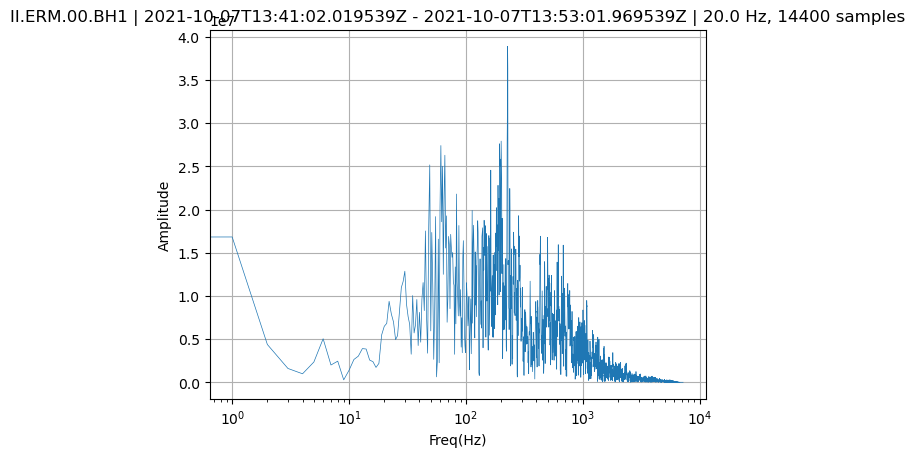

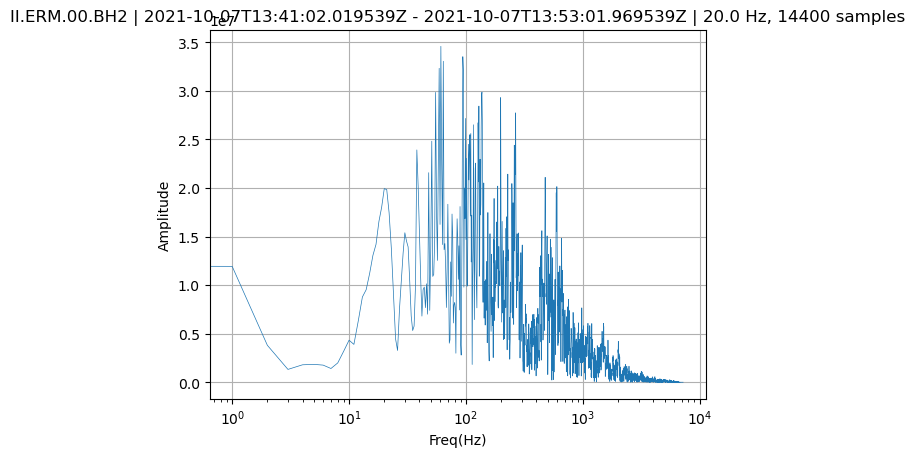

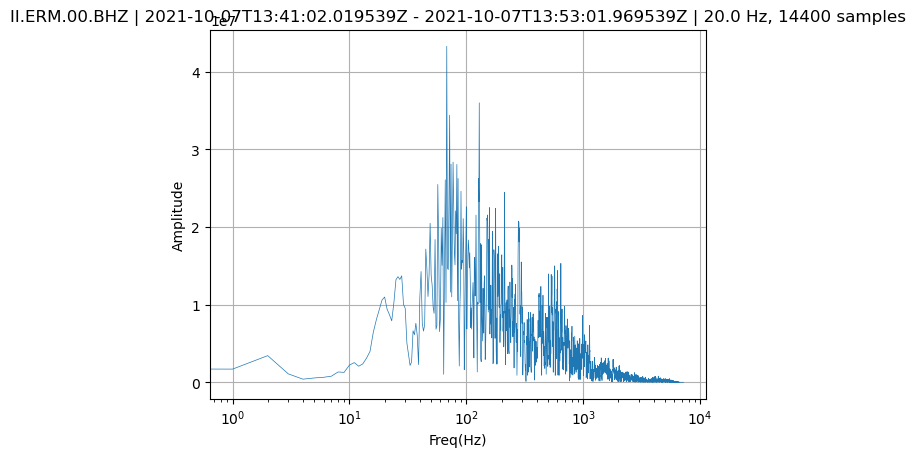

In [73]:
plt.show(Datafft)